In [28]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import nltk
import string
import re

In [29]:
#Get data file names
path =r'C:\Users\user\Desktop\data\reviewdataset'
files = glob.glob(path + "/*.csv")
df = []
for filename in files:
    df.append(pd.read_csv(filename))
#Concatenate all data into one DataFrame
RatingReview = pd.concat(df, ignore_index=True)

In [30]:
RatingReview

,Unnamed: 0,Rating,Reviews,Ratings,Unnamed: 3
0,0,3.9 out of 5,First of all its a very good product consideri...,3.9,NaN
1,1,4.3 out of 5,This review is after 4 hours of continuous usa...,4.3,NaN
2,2,4.1 out of 5,I have purchased this boat earphone few months...,4.1,NaN
3,3,4.2 out of 5,This is my honest review after using it for 20...,4.2,NaN
4,4,4.1 out of 5,"This earphones are unreliable, i bought it bef...",4.1,NaN
...,...,...,...,...,...
17658,1119,NaN,Loved the watch..\nPros: Amazing Battery\nNice...,4.1,NaN
17659,1120,NaN,Superb quality amazing watch i like it so much...,3.9,NaN
17660,1121,NaN,Superb quality amazing watch i like it so much...,3.9,NaN
17661,1122,NaN,"After using it for 1 month, here is my review:...",4.3,NaN


In [31]:
RatingReview=RatingReview.drop(['Unnamed: 0','Rating','Unnamed: 3'], axis=1)

In [32]:
RatingReview.shape

(17663, 2)

The shape of the DataFrame is 17663 rows and 2 columns.

In [33]:
RatingReview.head(10)

,Reviews,Ratings
0,First of all its a very good product consideri...,3.9
1,This review is after 4 hours of continuous usa...,4.3
2,I have purchased this boat earphone few months...,4.1
3,This is my honest review after using it for 20...,4.2
4,"This earphones are unreliable, i bought it bef...",4.1
5,Totally impressed with this product\nWecool Mo...,3.7
6,I have purchased this boat earphone few months...,4.1
7,NOTE:\n@ There are thousands of reviews for th...,4.1
8,1. Great value for money\n2. 50mm driver deliv...,4.0
9,This is my honest review after using it for 20...,4.2


In [34]:
RatingReview.tail(10)

,Reviews,Ratings
17653,Loved the watch..\nPros: Amazing Battery\nNice...,4.1
17654,I am using it from a day. It's really good loo...,4.1
17655,I am using it from a day. It's really good loo...,4.1
17656,I am using it from a day. It's really good loo...,4.1
17657,Watch is really good and lt budget friendly. I...,4.1
17658,Loved the watch..\nPros: Amazing Battery\nNice...,4.1
17659,Superb quality amazing watch i like it so much...,3.9
17660,Superb quality amazing watch i like it so much...,3.9
17661,"After using it for 1 month, here is my review:...",4.3
17662,Excellent watch at this price point..\nAll fun...,4.3


In [35]:
RatingReview.sample(10)

,Reviews,Ratings
1175,Awsome service by flipkart... Got delivery wit...,4.0
6910,"I am a homemaker, though we have bought the sp...",3.8
16788,I have used from 1 weeks and it's really good ...,4.3
9665,The monitor was superb picture quality\nIn one...,4.1
16617,Good smart watch with amoled display under 5k,4.3
10723,A Great Camera having incredible image quality...,4.4
6796,"Awesome sound, Room shaking, worth buying, sou...",4.1
16996,Watch was awesome my wife fully satisfied with...,4.3
11080,I have had used many Redmi phones. I am compar...,4.2
97,Nice product...👍👍..,4.0


In [36]:
RatingReview.isnull().sum()

Reviews    45
Ratings     0
dtype: int64

The dataset is having 45 null values in Reviews.

In [37]:
RatingReview['Ratings']= RatingReview['Ratings'].round()

In [38]:
RatingReview.sample(10)

,Reviews,Ratings
7622,"Great laptop for the price, i add 8gb ram (gek...",4.0
4164,This Sub-Woofer is excellent in this price as ...,4.0
7526,Writing review after 15 day of use.It is absol...,5.0
17364,Nice and good fearture everything is fine i am...,4.0
7015,"Awesome sound, Room shaking, worth buying, sou...",4.0
6094,Excellent product in budget .i m loving it.i p...,4.0
5537,Super sound and bass,4.0
14355,This product works like a charm! It has extend...,4.0
15957,I've switched over from the Galaxy Watch to th...,4.0
11867,This is a good phona & low price\nCanara is ve...,4.0


In [39]:
RatingReview['Ratings']= RatingReview['Ratings'].astype(int)

In [40]:
RatingReview=RatingReview.dropna()

In [41]:
RatingReview.isnull().sum()

Reviews    0
Ratings    0
dtype: int64

In [42]:
RatingReview.dtypes

Reviews    object
Ratings     int32
dtype: object

In [43]:
RatingReview.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17618 entries, 0 to 17662
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  17618 non-null  object
 1   Ratings  17618 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 344.1+ KB


## EDA Analysis

4    15524
3     1029
5      975
2       52
1       38
Name: Ratings, dtype: int64


<AxesSubplot:ylabel='Ratings'>

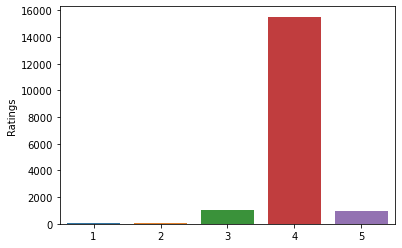

In [44]:
x=RatingReview['Ratings'].value_counts()
print(x)
sns.barplot(x.index,x)

In [45]:
#word_count
RatingReview['word_count'] = RatingReview['Reviews'].apply(lambda x: len(str(x).split()))
print(RatingReview[RatingReview['Ratings']==1]['word_count'].mean()) 
print(RatingReview[RatingReview['Ratings']==2]['word_count'].mean()) 
print(RatingReview[RatingReview['Ratings']==3]['word_count'].mean())
print(RatingReview[RatingReview['Ratings']==4]['word_count'].mean()) 
print(RatingReview[RatingReview['Ratings']==5]['word_count'].mean()) 

79.8157894736842
56.98076923076923
53.42662779397473
63.75380056686421
70.79384615384615


From the average wordcount we have Ratings=5 have highest average wordcount and Ratings=3 have lowest average wordcount. 

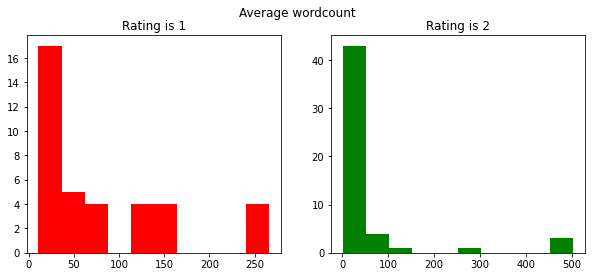

In [46]:
#plotting word_count
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=RatingReview[RatingReview['Ratings']==1]['word_count']
ax1.hist(train_words,color='Red')
ax1.set_title('Rating is 1')
train_words=RatingReview[RatingReview['Ratings']==2]['word_count']
ax2.hist(train_words,color='Green')
ax2.set_title('Rating is 2')
fig.suptitle('Average wordcount')
plt.show()

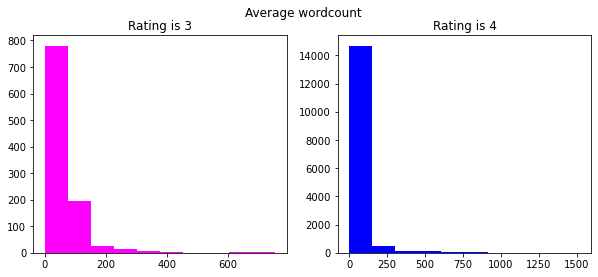

In [47]:
fig,(ax3,ax4)=plt.subplots(1,2,figsize=(10,4))
train_words=RatingReview[RatingReview['Ratings']==3]['word_count']
ax3.hist(train_words,color='Magenta')
ax3.set_title('Rating is 3')
train_words=RatingReview[RatingReview['Ratings']==4]['word_count']
ax4.hist(train_words,color='Blue')
ax4.set_title('Rating is 4')
fig.suptitle('Average wordcount')
plt.show()

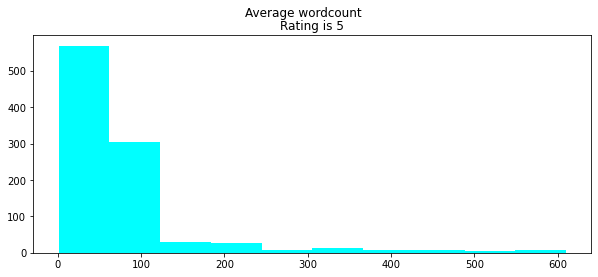

In [48]:
fig,(ax5)=plt.subplots(1,figsize=(10,4))
train_words=RatingReview[RatingReview['Ratings']==5]['word_count']
ax5.hist(train_words,color='Cyan')
ax5.set_title('Rating is 5')
fig.suptitle('Average wordcount')
plt.show()

In [49]:
#character-count
RatingReview['char_count'] = RatingReview['Reviews'].apply(lambda x: len(str(x)))
print(RatingReview[RatingReview['Ratings']==1]['char_count'].mean()) 
print(RatingReview[RatingReview['Ratings']==2]['char_count'].mean()) 
print(RatingReview[RatingReview['Ratings']==3]['char_count'].mean()) 
print(RatingReview[RatingReview['Ratings']==4]['char_count'].mean()) 
print(RatingReview[RatingReview['Ratings']==5]['char_count'].mean()) 

435.7105263157895
308.0192307692308
292.3654033041788
353.6182040711157
390.0625641025641


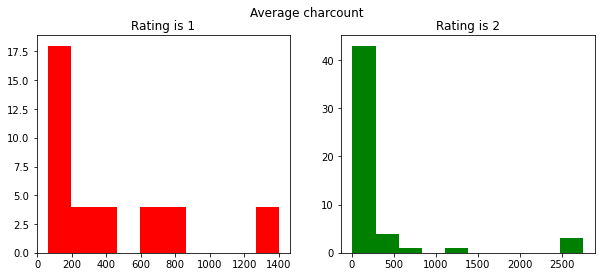

In [50]:
#plotting character_count
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=RatingReview[RatingReview['Ratings']==1]['char_count']
ax1.hist(train_words,color='Red')
ax1.set_title('Rating is 1')
train_words=RatingReview[RatingReview['Ratings']==2]['char_count']
ax2.hist(train_words,color='Green')
ax2.set_title('Rating is 2')
fig.suptitle('Average charcount')
plt.show()

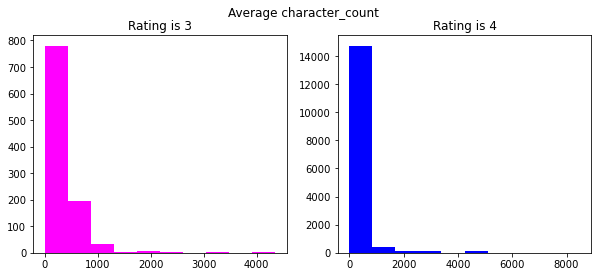

In [51]:
fig,(ax3,ax4)=plt.subplots(1,2,figsize=(10,4))
train_words=RatingReview[RatingReview['Ratings']==3]['char_count']
ax3.hist(train_words,color='Magenta')
ax3.set_title('Rating is 3')
train_words=RatingReview[RatingReview['Ratings']==4]['char_count']
ax4.hist(train_words,color='Blue')
ax4.set_title('Rating is 4')
fig.suptitle('Average character_count')
plt.show()

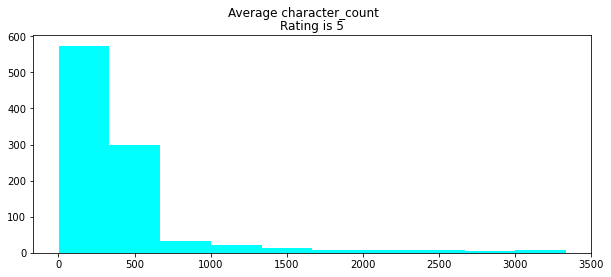

In [52]:
fig,(ax5)=plt.subplots(1,figsize=(10,4))
train_words=RatingReview[RatingReview['Ratings']==5]['char_count']
ax5.hist(train_words,color='Cyan')
ax5.set_title('Rating is 5')
fig.suptitle('Average character_count')
plt.show()

From the character count we can say that Ratings=1 has maximum number of character count whereas Ratings=3 have minimum number of character count

## Text Preprocessing

In [53]:
!pip install nltk

In [54]:
import nltk
import string

#### Lower Case

In [55]:
RatingReview["Reviews"] = RatingReview["Reviews"].str.lower()
RatingReview.head()

,Reviews,Ratings,word_count,char_count
0,first of all its a very good product consideri...,4,123,656
1,this review is after 4 hours of continuous usa...,4,277,1625
2,i have purchased this boat earphone few months...,4,217,1305
3,this is my honest review after using it for 20...,4,63,309
4,"this earphones are unreliable, i bought it bef...",4,68,374


In [56]:
RatingReview.drop(['word_count','char_count'], axis=1, inplace=True)

In [57]:
RatingReview['Reviews']=RatingReview['Reviews'].astype('str')

#### Removing Punctuation

In [58]:
import re
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
#remove punctuation
RatingReview['Reviews'] = RatingReview['Reviews'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [60]:
RatingReview

,Reviews,Ratings
0,first of all its a very good product consideri...,4
1,this review is after 4 hours of continuous usa...,4
2,i have purchased this boat earphone few months...,4
3,this is my honest review after using it for 20...,4
4,this earphones are unreliable i bought it befo...,4
...,...,...
17658,loved the watch\npros amazing battery\nnice di...,4
17659,superb quality amazing watch i like it so much...,4
17660,superb quality amazing watch i like it so much...,4
17661,after using it for 1 month here is my review\n...,4


#### Removing Numbers and words containing digits

In [61]:
# Remove numbers  
RatingReview['Reviews'] = RatingReview['Reviews'].apply(lambda x: re.sub('W*dw*','',x))

In [62]:
RatingReview

,Reviews,Ratings
0,first of all its a very goo prouct consiering ...,4
1,this review is after 4 hours of continuous usa...,4
2,i have purchase this boat earphone few months ...,4
3,this is my honest review after using it for 20...,4
4,this earphones are unreliable i bought it befo...,4
...,...,...
17658,love the watch\npros amazing battery\nnice isp...,4
17659,superb quality amazing watch i like it so much...,4
17660,superb quality amazing watch i like it so much...,4
17661,after using it for 1 month here is my review\n...,4


#### Removal of Stopwords

In [63]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [64]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
RatingReview['Reviews'] = RatingReview['Reviews'].apply(lambda x: remove_stopwords(x))

In [65]:
RatingReview

,Reviews,Ratings
0,first goo prouct consiering price soun 55 bass...,4
1,review 4 hours continuous usage first ay expos...,4
2,purchase boat earphone months ago😊 im sharing ...,4
3,honest review using 20 ays price range best on...,4
4,earphones unreliable bought 15 ays meanwhile r...,4
...,...,...
17658,love watch pros amazing battery nice isplay am...,4
17659,superb quality amazing watch like much super f...,4
17660,superb quality amazing watch like much super f...,4
17661,using 1 month review 1 charging realme watch 1...,4


#### Removal of Frequent Words

In [66]:
from collections import Counter
cnt = Counter()
for text in RatingReview["Reviews"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('goo', 15900),
 ('quality', 8023),
 ('prouct', 7950),
 ('soun', 6637),
 ('price', 5184),
 ('bass', 4911),
 ('watch', 4895),
 ('use', 4639),
 ('like', 4425),
 ('also', 3769),
 ('2', 3684),
 ('battery', 3626),
 ('best', 3508),
 ('monitor', 3461),
 ('one', 3424),
 ('awesome', 3213),
 ('great', 3162),
 ('nice', 3033),
 ('isplay', 3013),
 ('1', 2999)]

In [67]:
freqwords = set([w for (w, wc) in cnt.most_common(10)])
def remove_frequent(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in freqwords])

RatingReview["Reviews"] = RatingReview["Reviews"].apply(lambda text: remove_frequent(text))
RatingReview.head(10)

,Reviews,Ratings
0,first consiering 55 55 pls note excellent ont ...,4
1,review 4 hours continuous usage first ay expos...,4
2,purchase boat earphone months ago😊 im sharing ...,4
3,honest review using 20 ays range best onethe p...,4
4,earphones unreliable bought 15 ays meanwhile r...,4
5,totally impresse wecool moonwalk m3 earbus ama...,4
6,purchase boat earphone months ago😊 im sharing ...,4
7,note thousans reviews surprisingly theres harl...,4
8,1 great value money 2 50mm river elivers souns...,4
9,honest review using 20 ays range best onethe p...,4


#### Removal of Rare Words

In [68]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

RatingReview["Reviews"] = RatingReview["Reviews"].apply(lambda text: remove_rarewords(text))
RatingReview.head()

,Reviews,Ratings
0,first consiering 55 55 pls note excellent ont ...,4
1,review 4 hours continuous usage first ay expos...,4
2,purchase boat earphone months ago😊 im sharing ...,4
3,honest review using 20 ays range best onethe p...,4
4,earphones unreliable bought 15 ays meanwhile r...,4


#### Lemmatization

In [69]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

RatingReview["Reviews"] = RatingReview["Reviews"].apply(lambda text: lemmatize_words(text))
RatingReview["Reviews"].head()

0    first consiering 55 55 pls note excellent ont ...
1    review 4 hour continuous usage first ay expose...
2    purchase boat earphone month ago😊 im share exp...
3    honest review use 20 ays range best onethe pro...
4    earphone unreliable buy 15 ays meanwhile right...
Name: Reviews, dtype: object

####  Emojis Removal

In [70]:
!pip install emoji

In [71]:
def emoji_removal(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [72]:
RatingReview["Reviews"] = RatingReview["Reviews"].apply(emoji_removal)

In [73]:
RatingReview

,Reviews,Ratings
0,first consiering 55 55 pls note excellent ont ...,4
1,review 4 hour continuous usage first ay expose...,4
2,purchase boat earphone month ago im share expe...,4
3,honest review use 20 ays range best onethe pro...,4
4,earphone unreliable buy 15 ays meanwhile right...,4
...,...,...
17658,love pro amaze battery nice isplay amole woul ...,4
17659,superb amaze much super fast elivery 22 hour,4
17660,superb amaze much super fast elivery 22 hour,4
17661,use 1 month review 1 charge realme 100 100 34 ...,4


#### URL Removal

In [74]:
def urls_removal(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [75]:
RatingReview['Reviews'] = RatingReview['Reviews'].apply(urls_removal)

#### HTML Tags Removal

In [76]:
def html_removal(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [77]:
RatingReview['Reviews'] = RatingReview['Reviews'].apply(urls_removal)

In [78]:
RatingReview['Reviews']

0        first consiering 55 55 pls note excellent ont ...
1        review 4 hour continuous usage first ay expose...
2        purchase boat earphone month ago im share expe...
3        honest review use 20 ays range best onethe pro...
4        earphone unreliable buy 15 ays meanwhile right...
                               ...                        
17658    love pro amaze battery nice isplay amole woul ...
17659         superb amaze much super fast elivery 22 hour
17660         superb amaze much super fast elivery 22 hour
17661    use 1 month review 1 charge realme 100 100 34 ...
17662    excellent point functinlons work properly call...
Name: Reviews, Length: 17618, dtype: object

## Data Preparation

In [79]:
!pip install xgboost

In [80]:
!pip install keras

In [81]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import tensorflow as tf
from numpy import array

In [82]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(RatingReview['Reviews'], RatingReview['Ratings'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

## Feature Engineering

In the feature Engineering we will use different ideas to obtain relevant features from the dataset.

#### Count Vectors as features

In [83]:
# create a count vectorizer object
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', lowercase=False)
count_vect.fit(RatingReview['Reviews'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

#### TF-IDF Vectors as features

In [84]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=20000)
tfidf_vect.fit(RatingReview['Reviews'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=20000)
tfidf_vect_ngram.fit(RatingReview['Reviews'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=20000)
tfidf_vect_ngram_chars.fit(RatingReview['Reviews'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)

### Word Embeddings

In [85]:
# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(RatingReview['Reviews'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

### Now we will select NLP based features

In [86]:
RatingReview['char_count'] = RatingReview['Reviews'].apply(len)
RatingReview['word_count'] = RatingReview['Reviews'].apply(lambda x: len(x.split()))
RatingReview['word_density'] = RatingReview['char_count'] / (RatingReview['word_count']+1)
RatingReview['punctuation_count'] = RatingReview['Reviews'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
RatingReview['title_word_count'] = RatingReview['Reviews'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
RatingReview['upper_case_word_count'] = RatingReview['Reviews'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [87]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

RatingReview['noun_count'] = RatingReview['Reviews'].apply(lambda x: check_pos_tag(x, 'noun'))
RatingReview['verb_count'] = RatingReview['Reviews'].apply(lambda x: check_pos_tag(x, 'verb'))
RatingReview['adj_count'] = RatingReview['Reviews'].apply(lambda x: check_pos_tag(x, 'adj'))
RatingReview['adv_count'] = RatingReview['Reviews'].apply(lambda x: check_pos_tag(x, 'adv'))
RatingReview['pron_count'] = RatingReview['Reviews'].apply(lambda x: check_pos_tag(x, 'pron'))

# Machine Learning Models

### Defining Classifier Model

In [97]:
def model_training(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return [metrics.accuracy_score(predictions, valid_y),metrics.confusion_matrix(predictions, valid_y),metrics.classification_report(predictions, valid_y)];

### Naive Bayes Classification Model

In [99]:
# Naive Bayes on Count Vectors
accuracy = model_training(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = model_training(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = model_training(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = model_training(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("NB, CharLevel Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

NB, Count Vectors:  [0.8308740068104427, array([[   0,    0,    0,    3,    0],
       [   0,    0,    0,    3,    2],
       [   2,    1,  118,  136,    6],
       [   3,    8,  138, 3464,  153],
       [   0,    0,    7,  283,   78]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         3\n           1       0.00      0.00      0.00         5\n           2       0.45      0.45      0.45       263\n           3       0.89      0.92      0.91      3766\n           4       0.33      0.21      0.26       368\n\n    accuracy                           0.83      4405\n   macro avg       0.33      0.32      0.32      4405\nweighted avg       0.82      0.83      0.82      4405\n']
Confusion Matrix: <function confusion_matrix at 0x000002C81835B550>
Classification_Report: <function classification_report at 0x000002C81835BDC0>
NB, WordLevel TF-IDF:  [0.8887627695800226, array([[   0,    0,    0,    0,    0],
       [   0,    

### DecisionTreeClassifier

In [101]:
# Classifier on Count Vectors
accuracy = model_training(DecisionTreeClassifier(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Classifier on Word Level TF IDF Vectors
accuracy = model_training(DecisionTreeClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Classifier on Ngram Level TF IDF Vectors
accuracy = model_training(DecisionTreeClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Classifier on Character Level TF IDF Vectors
accuracy = model_training(DecisionTreeClassifier(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

LR, Count Vectors:  [0.9232690124858116, array([[   2,    0,    0,    2,    0],
       [   0,    9,    0,    0,    1],
       [   1,    0,  140,   44,   14],
       [   2,    0,  119, 3837,  145],
       [   0,    0,    4,    6,   79]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.40      0.50      0.44         4\n           1       1.00      0.90      0.95        10\n           2       0.53      0.70      0.61       199\n           3       0.99      0.94      0.96      4103\n           4       0.33      0.89      0.48        89\n\n    accuracy                           0.92      4405\n   macro avg       0.65      0.79      0.69      4405\nweighted avg       0.95      0.92      0.93      4405\n']
Confusion Matrix: <function confusion_matrix at 0x000002C81835B550>
Classification_Report: <function classification_report at 0x000002C81835BDC0>
LR, WordLevel TF-IDF:  [0.9244040862656072, array([[   2,    0,    0,    2,    0],
       [   0,    

### KNeighborsClassifier

In [102]:
# Classifier on Count Vectors
accuracy = model_training(KNeighborsClassifier(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Classifier on Word Level TF IDF Vectors
accuracy = model_training(KNeighborsClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Classifier on Ngram Level TF IDF Vectors
accuracy = model_training(KNeighborsClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Classifier on Character Level TF IDF Vectors
accuracy = model_training(KNeighborsClassifier(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

LR, Count Vectors:  [0.9064699205448354, array([[   2,    0,    0,    3,    0],
       [   0,    7,    2,    4,    1],
       [   1,    0,  112,   44,    9],
       [   2,    2,  144, 3826,  183],
       [   0,    0,    5,   12,   46]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.40      0.40      0.40         5\n           1       0.78      0.50      0.61        14\n           2       0.43      0.67      0.52       166\n           3       0.98      0.92      0.95      4157\n           4       0.19      0.73      0.30        63\n\n    accuracy                           0.91      4405\n   macro avg       0.56      0.65      0.56      4405\nweighted avg       0.95      0.91      0.92      4405\n']
Confusion Matrix: <function confusion_matrix at 0x000002C81835B550>
Classification_Report: <function classification_report at 0x000002C81835BDC0>
LR, WordLevel TF-IDF:  [0.9101021566401816, array([[   2,    0,    0,    1,    0],
       [   0,    

### Support Vector Machine

In [103]:
# SVM on Ngram Level TF IDF Vectors
accuracy = model_training(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, N-Gram Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

SVM, N-Gram Vectors:  [0.9166855845629966, array([[   2,    0,    0,    1,    0],
       [   0,    7,    0,    0,    1],
       [   1,    1,  101,   14,    6],
       [   2,    1,  160, 3871,  175],
       [   0,    0,    2,    3,   57]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.40      0.67      0.50         3\n           1       0.78      0.88      0.82         8\n           2       0.38      0.82      0.52       123\n           3       1.00      0.92      0.96      4209\n           4       0.24      0.92      0.38        62\n\n    accuracy                           0.92      4405\n   macro avg       0.56      0.84      0.64      4405\nweighted avg       0.97      0.92      0.94      4405\n']
Confusion Matrix: <function confusion_matrix at 0x000002C81835B550>
Classification_Report: <function classification_report at 0x000002C81835BDC0>


## Bagging Model

### Random Forest Model

In [104]:
# RF on Count Vectors
accuracy = model_training(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# RF on Word Level TF IDF Vectors
accuracy = model_training(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

RF, Count Vectors:  [0.9257661748013621, array([[   2,    0,    0,    1,    0],
       [   0,    9,    0,    0,    1],
       [   1,    0,  131,   29,   10],
       [   2,    0,  128, 3853,  145],
       [   0,    0,    4,    6,   83]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.40      0.67      0.50         3\n           1       1.00      0.90      0.95        10\n           2       0.50      0.77      0.60       171\n           3       0.99      0.93      0.96      4128\n           4       0.35      0.89      0.50        93\n\n    accuracy                           0.93      4405\n   macro avg       0.65      0.83      0.70      4405\nweighted avg       0.96      0.93      0.94      4405\n']
Confusion Matrix: <function confusion_matrix at 0x000002C81835B550>
Classification_Report: <function classification_report at 0x000002C81835BDC0>
RF, WordLevel TF-IDF:  [0.9257661748013621, array([[   2,    0,    0,    1,    0],
       [   0,    

## Boosting Algorithms

### Gradient Boosting Classifier

In [105]:
# Classifier on Count Vectors
accuracy = model_training(GradientBoostingClassifier(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Classifier on Word Level TF IDF Vectors
accuracy = model_training(GradientBoostingClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Classifier on Ngram Level TF IDF Vectors
accuracy = model_training(GradientBoostingClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Classifier on Character Level TF IDF Vectors
accuracy = model_training(GradientBoostingClassifier(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

LR, Count Vectors:  [0.8982973893303065, array([[   2,    0,    0,    4,    0],
       [   0,    5,    0,    0,    1],
       [   0,    0,   41,    0,    0],
       [   3,    4,  221, 3884,  213],
       [   0,    0,    1,    1,   25]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.40      0.33      0.36         6\n           1       0.56      0.83      0.67         6\n           2       0.16      1.00      0.27        41\n           3       1.00      0.90      0.95      4325\n           4       0.10      0.93      0.19        27\n\n    accuracy                           0.90      4405\n   macro avg       0.44      0.80      0.49      4405\nweighted avg       0.98      0.90      0.93      4405\n']
Confusion Matrix: <function confusion_matrix at 0x000002C81835B550>
Classification_Report: <function classification_report at 0x000002C81835BDC0>
LR, WordLevel TF-IDF:  [0.9078320090805903, array([[   3,    0,    0,    3,    0],
       [   0,    

### XGBoost Implementation

In [106]:
# Extereme Gradient Boosting on Count Vectors
accuracy = model_training(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print ("Xgb, Count Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = model_training(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy = model_training(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print ("Xgb, CharLevel Vectors: ", accuracy)
print("Confusion Matrix:", confusion_matrix)
print("Classification_Report:", classification_report)

[10:37:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgb, Count Vectors:  [0.9205448354143019, array([[   2,    0,    0,    1,    0],
       [   0,    9,    0,    0,    1],
       [   1,    0,  107,   11,    6],
       [   2,    0,  152, 3873,  168],
       [   0,    0,    4,    4,   64]], dtype=int64), '              precision    recall  f1-score   support\n\n           0       0.40      0.67      0.50         3\n           1       1.00      0.90      0.95        10\n           2       0.41      0.86      0.55       125\n           3       1.00      0.92      0.96      4195\n           4       0.27      0.89      0.41        72\n\n    accuracy                           0.92      4405\n   macro avg       0.61      0.85      0.67    

## Shallow Neural Network

In [65]:
def create_model_architecture(input_size):
    # create input layer 
    input_layer = layers.Input((input_size, ), sparse=True)
    
    # create hidden layer
    hidden_layer = layers.Dense(100, activation="relu")(input_layer)
    
    # create output layer
    output_layer = layers.Dense(1, activation="relu")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=tf.optimizers.Adam(), loss='categorical_crossentropy')
    return classifier 

classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
accuracy = model_training(classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, is_neural_net=True)
print ("NN, Ngram Level TF IDF Vectors",  accuracy)

413/413 [==============================] - 16s 36ms/step - loss: nan
NN, Ngram Level TF IDF Vectors 0.002497162315550511


### Final Model can be selected as XGBoost as it is having highest accuracy.